# Airbnb price prediction

In [ ]:
import pyforest
data=pd.read_csv("train.csv")
data.head()

# Data analysis andd exploration

In [92]:
data.shape

(74111, 29)

In [86]:
data.amenities[0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [95]:

data = {'sets_column': [{'Wireless Internet', 'Air conditioning', 'Kitchen', 'Heating', 'Family/kid friendly', 'Essentials', 'Hair dryer', 'Iron', 'translation missing: en.hosting_amenity_50'}]}

df = pd.DataFrame(data)

df['list_column'] = df['sets_column'].apply(lambda x: [f'"{item}"' for item in x])

print(df)


                                         sets_column  \
0  {Essentials, Kitchen, translation missing: en....   

                                         list_column  
0  ["Essentials", "Kitchen", "translation missing...  


In [93]:
data.amenities=data.amenities.apply(lambda x:  [f'"{item}"' for item in x])


In [94]:
data.amenities

0        ["{", """, "W", "i", "r", "e", "l", "e", "s", ...
1        ["{", """, "W", "i", "r", "e", "l", "e", "s", ...
2        ["{", "T", "V", ",", """, "C", "a", "b", "l", ...
3        ["{", "T", "V", ",", """, "C", "a", "b", "l", ...
4        ["{", "T", "V", ",", "I", "n", "t", "e", "r", ...
                               ...                        
74106                                           ["{", "}"]
74107    ["{", "T", "V", ",", """, "C", "a", "b", "l", ...
74108    ["{", "T", "V", ",", "I", "n", "t", "e", "r", ...
74109    ["{", "T", "V", ",", """, "W", "i", "r", "e", ...
74110    ["{", "T", "V", ",", "I", "n", "t", "e", "r", ...
Name: amenities, Length: 74111, dtype: object

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [66]:
data.drop(data[["amenities"]],inplace=True ,axis=1)

In [5]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [63]:
data["description"][0]

'Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.'

In [52]:
data.thumbnail_url[2]

'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-null

In [7]:
data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [8]:
clean=['first_review','host_response_rate','last_review','review_scores_rating']
data.drop(data[clean],inplace=True,axis=1)


In [9]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,NaN,20009,0.0,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  host_has_profile_pic    73923 non-null  object 
 12  host_identity_verified  73923 non-null  object 
 13  host_since              73923 non-null  object 
 14  instant_bookable        74111 non-null

In [11]:
categorical=[]
numerical=[]
for i in data.columns:
    if data[i].dtype=='object' or data[i].dtype=='bool':
        categorical.append(i)
    else:
        numerical.append(i)
    

In [12]:
categorical,numerical

(['property_type',
  'room_type',
  'bed_type',
  'cancellation_policy',
  'cleaning_fee',
  'city',
  'description',
  'host_has_profile_pic',
  'host_identity_verified',
  'host_since',
  'instant_bookable',
  'name',
  'neighbourhood',
  'thumbnail_url',
  'zipcode'],
 ['id',
  'log_price',
  'accommodates',
  'bathrooms',
  'latitude',
  'longitude',
  'number_of_reviews',
  'bedrooms',
  'beds'])

In [13]:
data['host_has_profile_pic'].value_counts()

t    73697
f      226
Name: host_has_profile_pic, dtype: int64

In [14]:
data_num=data[numerical]
data_num.head()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,bedrooms,beds
0,6901257,5.010635,3,1.0,40.696524,-73.991617,2,1.0,1.0
1,6304928,5.129899,7,1.0,40.766115,-73.989040,6,3.0,3.0
2,7919400,4.976734,5,1.0,40.808110,-73.943756,10,1.0,3.0
3,13418779,6.620073,4,1.0,37.772004,-122.431619,0,2.0,2.0
4,3808709,4.744932,2,1.0,38.925627,-77.034596,4,0.0,1.0


In [15]:
data_cat=data[categorical]
data_cat.head()

,property_type,room_type,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,2012-03-26,f,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,f,2017-06-19,t,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,t,2016-10-25,t,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027
3,House,Entire home/apt,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,2015-04-19,f,Beautiful Flat in the Heart of SF!,Lower Haight,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0
4,Apartment,Entire home/apt,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,t,2015-03-01,t,Great studio in midtown DC,Columbia Heights,NaN,20009


In [16]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)

In [17]:
filled=pd.DataFrame(imputer.fit_transform(data_num),columns=data_num.columns)

<IPython.core.display.Javascript object>

In [18]:
filled.isna().sum()

id                   0
log_price            0
accommodates         0
bathrooms            0
latitude             0
longitude            0
number_of_reviews    0
bedrooms             0
beds                 0
dtype: int64

In [19]:
data_cat.isna().sum()

property_type                0
room_type                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic       188
host_identity_verified     188
host_since                 188
instant_bookable             0
name                         0
neighbourhood             6872
thumbnail_url             8216
zipcode                    966
dtype: int64

In [20]:
data_cat.dropna(inplace=True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
data_cat.isna().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
city                   0
description            0
instant_bookable       0
name                   0
dtype: int64

In [22]:

merged_df = pd.concat([data_cat, filled], axis=1)
# Merge based on a common column (e.g., 'key_column')



<IPython.core.display.Javascript object>

In [23]:
merged_df.isna().sum()

property_type          0
room_type              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
city                   0
description            0
instant_bookable       0
name                   0
id                     0
log_price              0
accommodates           0
bathrooms              0
latitude               0
longitude              0
number_of_reviews      0
bedrooms               0
beds                   0
dtype: int64

In [57]:
merged_df.head()

,room_type,cancellation_policy,cleaning_fee,instant_bookable,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews
0,-0.850673,1.010455,0.60188,-0.596535,0.318608,-0.072041,-0.404481,0.730668,0.847996,-0.499640
1,-0.850673,1.010455,0.60188,1.676347,0.484855,1.785336,-0.404481,0.753262,0.848115,-0.393899
2,-0.850673,-0.159508,0.60188,1.676347,0.271352,0.856648,-0.404481,0.766896,0.850201,-0.288158
3,-0.850673,-1.329472,0.60188,-0.596535,2.562075,0.392303,-0.404481,-0.218806,-1.383730,-0.552510
4,-0.850673,-0.159508,0.60188,1.676347,-0.051767,-0.536385,-0.404481,0.155729,0.707800,-0.446769


In [25]:
merged_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.235353,38.445958,-92.397525,20.900568,1.265743,1.710961
std,6.081735e+06,0.717394,2.153589,0.581868,3.080167,21.705322,37.828641,0.851789,1.253649
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,10.000000,18.000000


# Data visualization

In [26]:
import warnings 

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bed_type', ylabel='count'>

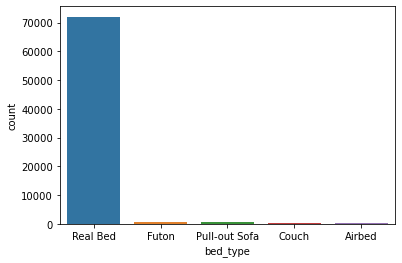

In [27]:
sns.countplot(merged_df["bed_type"])

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
columns_to_encode = ["property_type", "room_type", "bed_type", "cancellation_policy", "cleaning_fee", "instant_bookable"]

# Loop through each column and apply LabelEncoder
for column in columns_to_encode:
    merged_df[column] = lb.fit_transform(merged_df[column])










In [29]:
merged_df.drop(["city","description","name","id","beds","property_type","bedrooms","bed_type"],axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
scalling.fit(merged_df)
merged_df= pd.DataFrame(scalling.transform(merged_df), columns=merged_df.columns)


<IPython.core.display.Javascript object>

In [31]:
merged_df.head()

,room_type,cancellation_policy,cleaning_fee,instant_bookable,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews
0,-0.850673,1.010455,0.60188,-0.596535,0.318608,-0.072041,-0.404481,0.730668,0.847996,-0.499640
1,-0.850673,1.010455,0.60188,1.676347,0.484855,1.785336,-0.404481,0.753262,0.848115,-0.393899
2,-0.850673,-0.159508,0.60188,1.676347,0.271352,0.856648,-0.404481,0.766896,0.850201,-0.288158
3,-0.850673,-1.329472,0.60188,-0.596535,2.562075,0.392303,-0.404481,-0.218806,-1.383730,-0.552510
4,-0.850673,-0.159508,0.60188,1.676347,-0.051767,-0.536385,-0.404481,0.155729,0.707800,-0.446769


In [32]:
x=merged_df.drop(["log_price"], axis=1)
y=merged_df["log_price"]

In [33]:
print( x.shape)
print(y.shape)

(74111, 9)
(74111,)


In [34]:
merged_df.shape

(74111, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

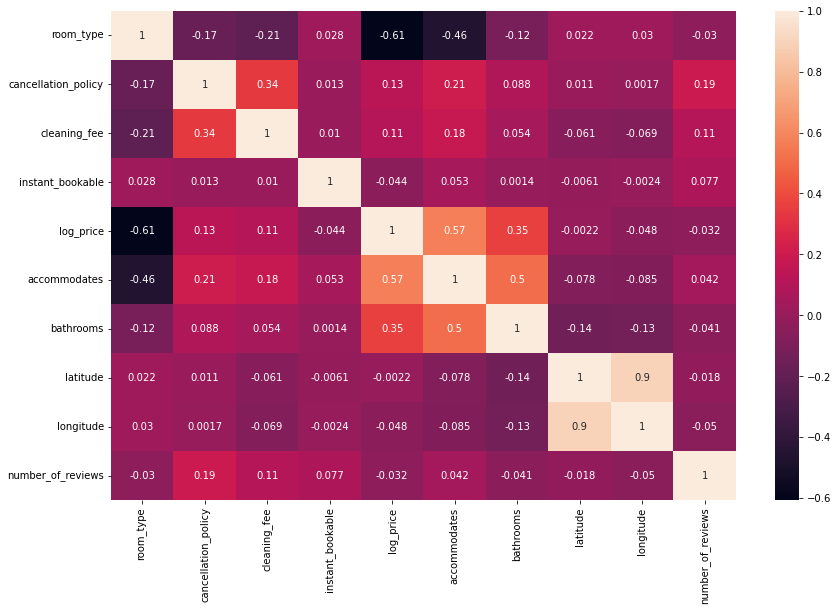

In [35]:
corr=merged_df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr,annot=True)

In [37]:
#spliting the train and test data
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [38]:
print(y_train.shape, y_test.shape)

(59288,) (14823,)


# using linear regression

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train, y_train)



LinearRegression()

In [41]:
pred=model.predict(x_test)

In [42]:
error_score=metrics.r2_score(y_test,pred)
print(error_score)

<IPython.core.display.Javascript object>

0.518046861101028


# using random forest regressor

In [43]:
models=RandomForestRegressor()

In [44]:
models.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
pred=models.predict(x_test)

In [46]:
error_score=metrics.r2_score(y_test,pred)
print(error_score)

<IPython.core.display.Javascript object>

0.6803621304534386
